# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

1. Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

List of Tags to Include:

List of Tags to Exclude:

2. Let's make a request to this stie to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```
   
   You can pass this into the `.get()` method of the `requests` module to get the HTML.

In [8]:
# Actually I copied the file to the hard drive to see if I can use it that way
# it turned out it was a mistake as the requests library cannot handle locally stored files :)

import requests
from bs4 import BeautifulSoup
url = "https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"
page = requests.get(url)
content = page.content

b'<!DOCTYPE html>\n<html lang="en">\n   <head>\n      <meta charset="utf-8">\n      <style>\n         #cacaoTable {\n         border-collapse: collapse;\n         border: 2px black solid;\n         font: 12px sans-serif;\n         }\n         #cacaoTable td {\n         border: 1px black solid;\n         padding: 5px;\n         }\n         #infoContainer {\n         margin-bottom: 10px;\n         display: inline-block;\n         margin-right: 10px;\n         }\n         #chocolate {\n         width: 300px;\n         }\n         #picContainer {\n         display: inline;\n         }\n      </style>\n   </head>\n   <body>\n      <!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->\n      <div id="banner">\n         <h1>Cacao Ratings</h1>\n      </div>\n      <div id="infoContainer">\n         <table class="infoTable">\n            <tr>\n               <td>Compiled ratings of over 1700 Chocolate bars</td>\n            </tr>\n            <tr>\n               <td>Ratings are from 1-

3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [9]:
soup = BeautifulSoup(content, "html.parser")

4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

In [27]:
# I am pulling the interesting colums into lists, I hope to add them as fields to the dataframe
company_class = soup.find_all(attrs={'class':'Company'})
company_list = [company.get_text() for company in company_class]
company_list[0] = 'Company'

origin_class = soup.find_all(attrs={'class' : 'BroadBeanOrigin'})
origin_list = [origin.get_text() for origin in origin_class]
origin_list[0] = 'Origin Country'

cocoa_percent_class = soup.find_all(attrs = {'class' : 'CocoaPercent'})
cocoa_percent_list = [cocoa.get_text() for cocoa in cocoa_percent_class]
cocoa_percent_list[0] = 'Cocoa Percent'

company_location_class = soup.find_all(attrs = {'class' : 'CompanyLocation'})
company_location_list = [company_location.get_text() for company_location in company_location_class]
company_location_list[0] = 'Company Location'

rating_class = soup.find_all(attrs = {'class' : 'Rating'})
rating_list = [rating.get_text() for rating in rating_class]
rating_list[0] = 'Rating'



In [37]:
# data cleanup: I want to remove the % and convert to number in cocoa percentage and convert the rating to float
# I realized I should have just pulled the data without the headers...

# I'll remove the headers and do the conversions and cleaning

company_list.pop(0)
origin_list.pop(0)
cocoa_percent_list.pop(0)
company_location_list.pop(0)
rating_list.pop(0)
rating_list = [float(rating) for rating in rating_list]

import pandas as pd

choco_df = pd.DataFrame(
    list(zip(company_list, origin_list, cocoa_percent_list, company_location_list, rating_list)),
    columns = ['company_name', 'origin_country', 'cocoa_percent', 'company_location', 'rating'])

print(choco_df.head())

  company_name origin_country  cocoa_percent company_location  rating
0     A. Morin      Venezuela            0.7           France    3.50
1     A. Morin      Venezuela            0.7           France    2.75
2     A. Morin           Peru            0.7           France    3.50
3     A. Morin         Panama            0.7           France    3.50
4     A. Morin     Madagascar            0.7           France    3.75


## How are ratings distributed?

5. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   
   Use a command on the `soup` object to get all of the tags that contain the ratings.

6. Create an empty list called `ratings` to store all the ratings in.

7. Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

   As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

8. Using Matplotlib, create a histogram of the ratings values:

```py
plt.hist(ratings)
```

   Remember to show the plot using `plt.show()`!

(array([  4.,  13.,  32., 141., 258., 643., 600.,  98.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

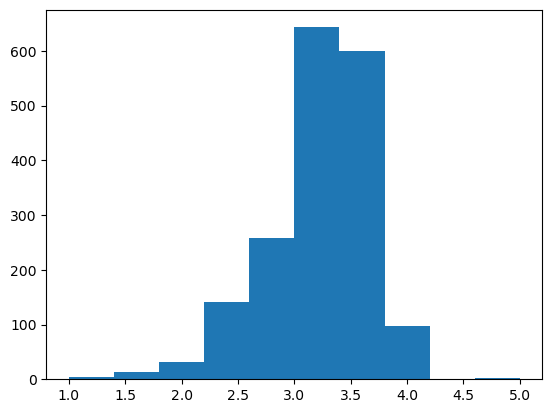

In [41]:
import matplotlib.pyplot as plt

plt.hist(rating_list)


## Which chocolatier makes the best chocolate?

9. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [43]:
mean_ratings = choco_df.groupby("company_name").rating.mean()
top_ten = mean_ratings.nlargest(10)
top_ten

company_name
Bernachon          4.000000
Coleman & Davis    4.000000
Indah              4.000000
Indaphoria         4.000000
Peppalo            4.000000
Pinellas           4.000000
Cacao Store        3.833333
Acalli             3.750000
Anahata            3.750000
Animas             3.750000
Name: rating, dtype: float64

10. Just like we did with ratings, we now want to make an empty list to hold company names.

11. Loop through the tags containing the company names, and add the text from each tag to the list you just created.

12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

13. Use `.grouby` to group your DataFrame by Company and take the average of the grouped ratings.

    Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. Print them out.
    
    Look at the hint if you get stuck on this step!

## Is more cacao better?

14. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

    It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!)
    
    Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the `%` character.

15. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

16. Make a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).

    You can do this in Matplotlib with these commands:
    
```py
plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()
```

Call `plt.clf()` to clear the figure between showing your histogram and this scatterplot.

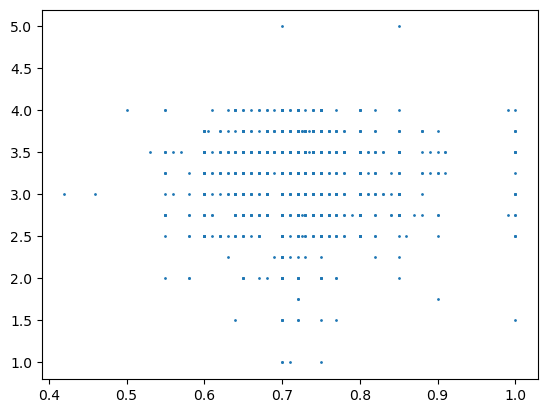

In [44]:
plt.scatter(choco_df.cocoa_percent, choco_df.rating, 1)

17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

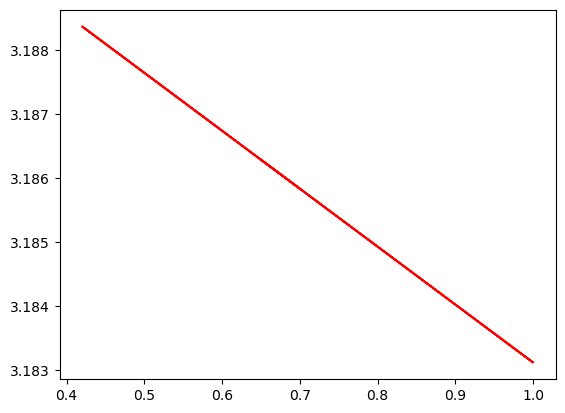

In [46]:
import numpy as np
z = np.polyfit(choco_df.cocoa_percent, choco_df.rating, 1)
line_function = np.poly1d(z)
plt.plot(choco_df.cocoa_percent, line_function(choco_df.cocoa_percent), "r-")

## Explore!

18. We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

    What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.
    
    For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

In [50]:
#choco_df.describe()
choco_df.head()
choco_df.describe(include='object')

,company_name,origin_country,company_location
count,1788,1788,1788
unique,416,100,60
top,Soma,Venezuela,U.S.A.
freq,47,213,764
